evitement ok


/Users/caio/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


RuntimeError: Requested MovieWriter (ffmpeg) not available

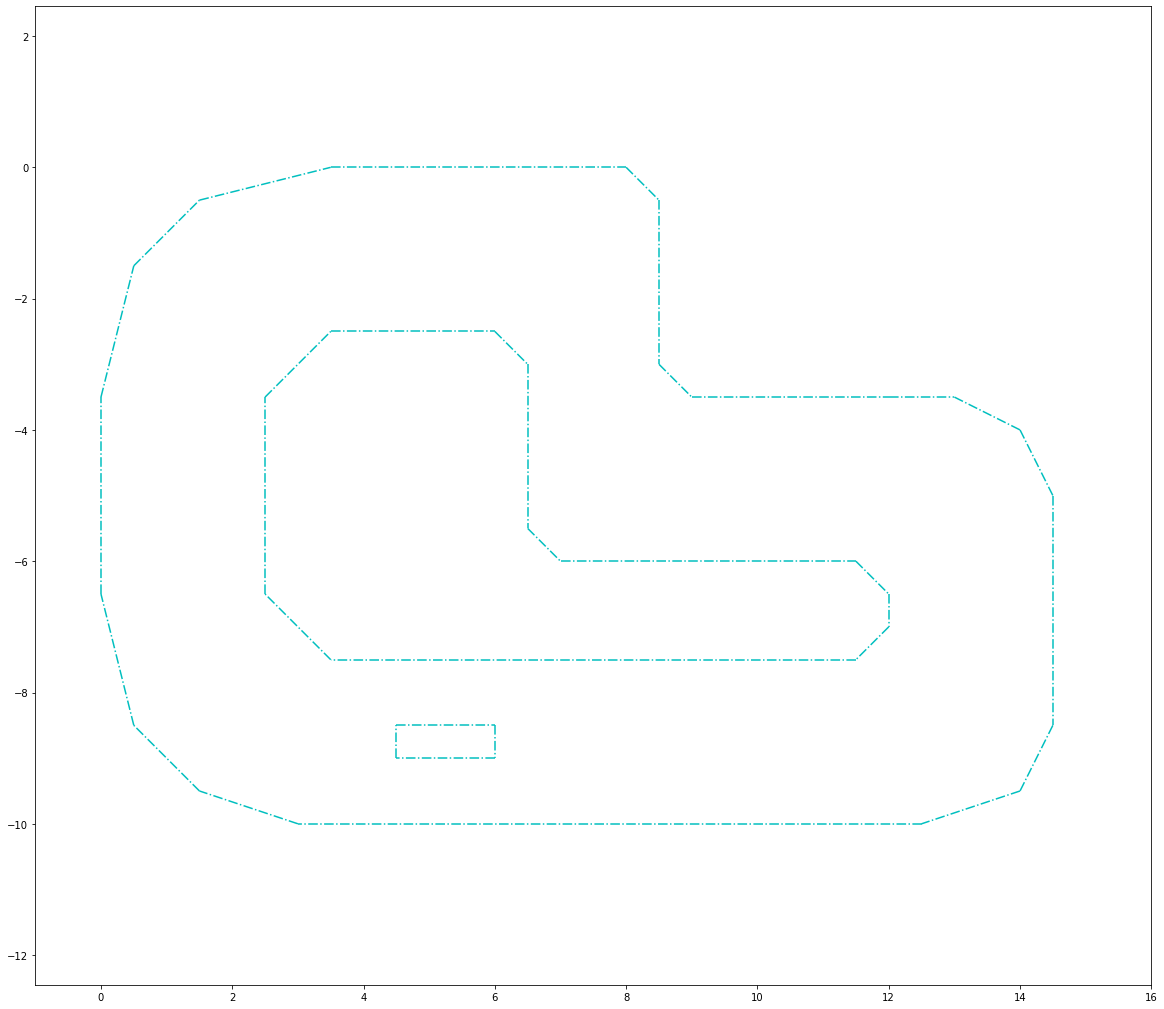

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'
import matplotlib.patches as patches
from matplotlib import animation
from IPython.display import HTML

from Simulation import *



Steps = 10 #number of simulation steps

#making all the enviroment
RaceTrack = MakeEnv()

#Car1
Car1Position = [10,-9]
Car1Speed = 0
Car1Orientation = 0
Car1Orientationold = 0
Lidar1 = []

#Car2
Car2Position = [10,-8]
Car2Speed =0
Car2Orientation = 0
Car2Orientationold = 0
Lidar2 = []

#simulation
Car1x =[]
Car1y =[]
Car1ori =[]
Car2x =[]
Car2y =[]
Car2ori =[]


j=0
while j < Steps:
    
    temp1 = Car1Orientation;
    temp2 = Car2Orientation;
    [Car1Position,Car1Orientation,Lidar1,Car1Speed] = Simulation(Car1Position,Car1Speed,Car1Orientation,Car1Orientationold,Lidar1, RaceTrack + [CarRectangle(Car2Position,Car2Orientation)])
    [Car2Position,Car2Orientation,Lidar2,Car2Speed] = Simulation(Car2Position,Car2Speed,Car2Orientation,Car2Orientationold,Lidar2, RaceTrack + [CarRectangle(Car1Position,Car1Orientation)])
    Car1Orientationold = temp1
    Car2Orientationold = temp2
    
    Car1x.append(Car1Position[0])
    Car1y.append(Car1Position[1])
    Car1ori.append(Car1Orientation)
    Car2x.append(Car2Position[0])
    Car2y.append(Car2Position[1])
    Car2ori.append(Car2Orientation)
    
    
    j+=1
    
    
    

    
#Plotting
fig = plt.figure(figsize=(20, 18))
plt.axis('equal')

#Racetrack
i =0
n=len(RaceTrack)
while i<n:
    nn=len(RaceTrack[i])
    j=0
    while j<(nn-1):
        plt.plot([RaceTrack[i][j][0],RaceTrack[i][j+1][0]],[RaceTrack[i][j][1],RaceTrack[i][j+1][1]],"c-.")
        j+=1
    i+=1
    
    
    
ax = fig.add_subplot(111)
ax.set_xlim(-1,16)
ax.set_ylim(-11,1)

patch1 = patches.Rectangle((0, 0), 0, 0, fc='k')
patch2 = patches.Rectangle((0, 0), 0, 0, fc='r')
point1, = ax.plot([], [],'ko')

def init():
    ax.add_patch(patch1)
    ax.add_patch(patch2)
    point1.set_data([], [])
    return (patch1,patch2,point1)

def animate(i):
    patch1.set_width(0.4)
    patch1.set_height(0.2)
    patch1.set_xy([Car1x[i], Car1y[i]])
    patch1.angle = Car1ori[i]
    patch2.set_width(0.4)
    patch2.set_height(0.2)
    patch2.set_xy([Car2x[i], Car2y[i]])
    patch2.angle = Car2ori[i]
    
    return (patch1,patch2,point1)

anim = animation.FuncAnimation(fig, animate,
                               init_func=init,
                               frames=len(Car1x),
                               interval=100,
                               blit=True)


HTML(anim.to_html5_video())
    
    
    